# Sale Analysis

### Import necessary libraries 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt


### Task #1: Data Importing - Merging 12 months of sales data into a single file

In [2]:
path = '/Users/tiana/Desktop/Portfolio/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
files = [file for file in os.listdir(path)]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(path +"/"+ file)
    all_months_data = pd.concat([all_months_data, df])

### Task #2: Data cleaning

In [3]:
# Check duplicates
all_data = all_months_data.drop_duplicates()

In [4]:
# Clean up null data
# Check nan rows: nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how = 'all')

In [5]:
# Check the data type
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [6]:
# Clean up the wrong rows
all_data = all_data[all_data['Price Each'] != 'Price Each']

In [7]:
all_data['Price Each'] = all_data['Price Each'].astype('float')

In [8]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')

In [9]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

/var/folders/lr/2t8ny2md34l35cz744w0lf0m0000gn/T/ipykernel_21918/3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


### Task #3: Data Processing 

#### 1. Add month columns

In [10]:
all_data['Month'] = all_data['Order Date'].dt.month

In [11]:
all_data['Month'] = all_data['Month'].astype('int32')

In [12]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6
13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6


#### 2. Add sale column

In [13]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

In [14]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99
13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95


#### 3. Add a city column

In [15]:
def get_city(address):
    city = address.split(',')[1]
    city = city.strip()
    return city

def get_state(address):
    state = address.split(',')[2].split(' ')[1]
    state = state.strip()
    return state

In [16]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

### Task #4: Data Analysis

# Question 1: What was the best month for sales? How much earned that month?


In [35]:
monthly_sales = all_data.groupby('Month')['Sales'].sum().reset_index()

In [37]:
monthly_sales = monthly_sales.sort_values(by = 'Month', ascending = True)

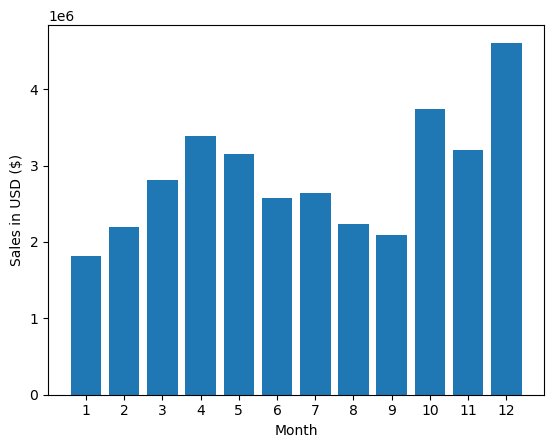

In [38]:
months = range(1,13)

plt.bar(months, monthly_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')

plt.show()

# Question 2: What city has the most sales?

In [39]:
city_sales = all_data.groupby('City')['Sales'].sum().reset_index()

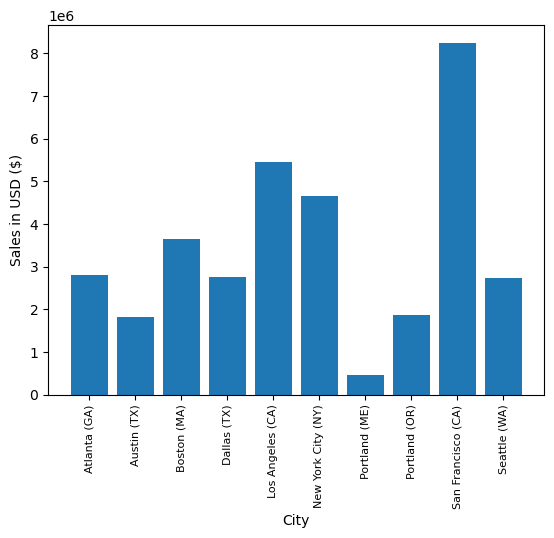

In [40]:
cities = city_sales['City'].unique()

plt.bar(cities, city_sales['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')

plt.show()

# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [41]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [42]:
hours = [hour for hour, df in all_data.groupby('Hour')]

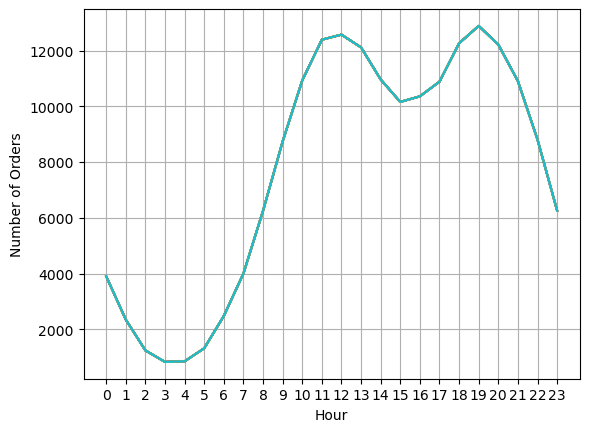

In [43]:
plt.plot(hours, all_data.groupby('Hour').count())

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

# Question 4: What products are most often sold together?

In [44]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]


In [45]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

/var/folders/lr/2t8ny2md34l35cz744w0lf0m0000gn/T/ipykernel_21918/759627908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"


In [46]:
df2 = df[['Order ID','Grouped']].drop_duplicates()

In [47]:
# Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Question 5: What product sold the most? Why do you think it sold the most?

In [49]:
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()

In [50]:
quantity_ordered

,Product,Quantity Ordered
0,20in Monitor,4126
1,27in 4K Gaming Monitor,6239
2,27in FHD Monitor,7541
3,34in Ultrawide Monitor,6192
4,AA Batteries (4-pack),27615
5,AAA Batteries (4-pack),30986
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
8,Flatscreen TV,4813
9,Google Phone,5529


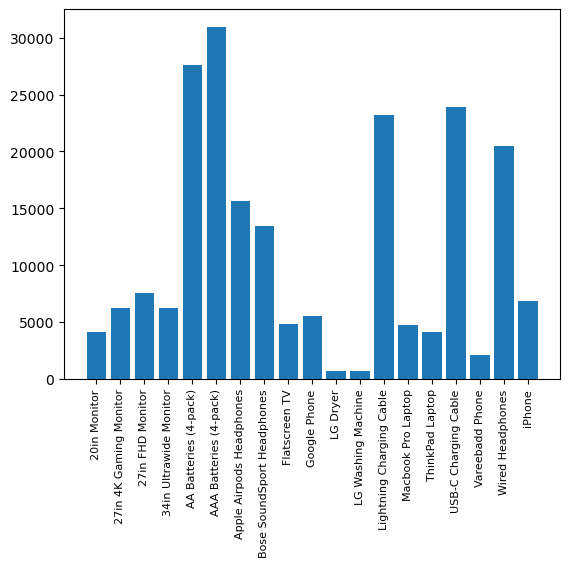

In [73]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

/var/folders/lr/2t8ny2md34l35cz744w0lf0m0000gn/T/ipykernel_21918/1237057308.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
/var/folders/lr/2t8ny2md34l35cz744w0lf0m0000gn/T/ipykernel_21918/1237057308.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


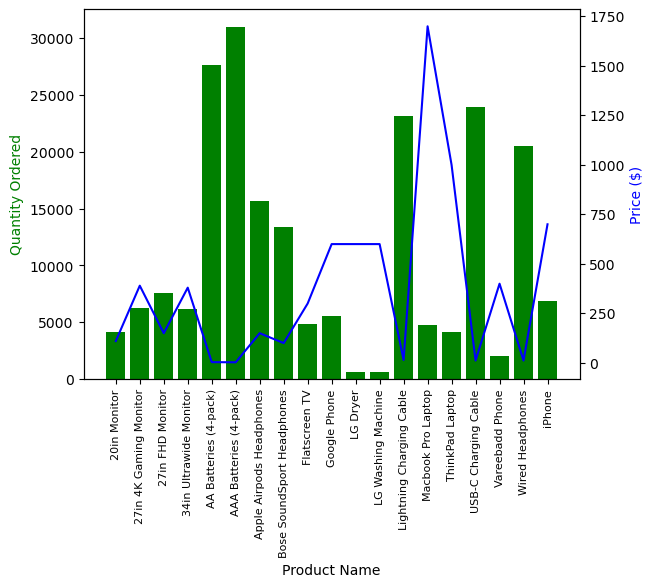

In [74]:
prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()